<a href="https://colab.research.google.com/github/ehcdc1967/Proyectos-de-Inversion/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
# Lista de URLs
urls = [ "https://github.com/ehcdc1967/Proyectos-de-Inversion/raw/main/DETALLE_INVERSIONES_1.parquet"
        ,"https://github.com/ehcdc1967/Proyectos-de-Inversion/raw/main/DETALLE_INVERSIONES_2.parquet"
        ,"https://github.com/ehcdc1967/Proyectos-de-Inversion/raw/main/DETALLE_INVERSIONES_3.parquet" ]

# Leer y concatenar los DataFrames
det = pd.concat([pd.read_parquet(url) for url in urls] , ignore_index=True )

In [ ]:
# Mostrar las primeras filas del DataFrame
det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255673 entries, 0 to 255672
Data columns (total 84 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NIVEL                      255673 non-null  object 
 1   SECTOR                     255673 non-null  object 
 2   ENTIDAD                    255673 non-null  object 
 3   CODIGO_UNICO               255606 non-null  object 
 4   CODIGO_SNIP                255673 non-null  object 
 5   NOMBRE_INVERSION           255673 non-null  object 
 6   NOMBRE_OPMI                198486 non-null  object 
 7   NOMBRE_UF                  251618 non-null  object 
 8   NOMBRE_UEI                 192624 non-null  object 
 9   SEC_EJEC                   255659 non-null  object 
 10  NOMBRE_UEP                 255241 non-null  object 
 11  ESTADO                     255673 non-null  object 
 12  SITUACION                  255673 non-null  object 
 13  MONTO_VIABLE               25

In [ ]:
df = pd.read_parquet('https://raw.githubusercontent.com/ehcdc1967/Proyectos-de-Inversion/main/poblacion.parquet')
df.drop(columns=['CODIGO_UNICO'], inplace=True, errors='ignore')

In [ ]:
df

,SOBRECOSTO,FUNCION,TIEMPO_VIABILIDAD,TIEMPO_EJECUCION,BENEFICIARIO,CTRL_CONCURR,MONTO_LAUDO,NATURALEZA_MEJORAMIENTO,NATURALEZA_AMPLIACION,NATURALEZA_RECUPERACION,NATURALEZA_CREACION,MODALIDAD_DIRECTA,MODALIDAD_INDIRECTA,MODIFICACION_F8,EXPEDIENTE_TECNICO,REGISTRADO_PMI,DPTO,TIPO_MUNICIPALIDAD,RATIO_ET_VIABLE,RATIO_ET_COSTO
0,0.0,"PLANEAMIENTO, GESTIÓN Y RESERVA DE CONTINGENCIA",11.0,700.0,2195.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,AYACUCHO,G,0.848373,1.0
1,0.0,AMBIENTE,4.0,153.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,HUANCAVELICA,G,0.000000,0.0
2,0.0,CULTURA Y DEPORTE,1.0,90.0,276.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,HUANCAVELICA,G,0.000000,0.0
3,1.0,"PLANEAMIENTO, GESTIÓN Y RESERVA DE CONTINGENCIA",7.0,275.0,3873.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,HUANCAVELICA,G,1.260067,1.0
4,0.0,VIVIENDA Y DESARROLLO URBANO,25.0,396.0,1663.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,TACNA,D,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52442,0.0,AGROPECUARIA,101.0,123.0,401.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,ANCASH,G,0.000000,0.0
52443,1.0,VIVIENDA Y DESARROLLO URBANO,30.0,61.0,258.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,AYACUCHO,G,1.412352,1.0
52444,0.0,SANEAMIENTO,37.0,365.0,148.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,AYACUCHO,E,0.000000,0.0
52445,0.0,EDUCACIÓN,1.0,153.0,864.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LAMBAYEQUE,D,0.000000,0.0


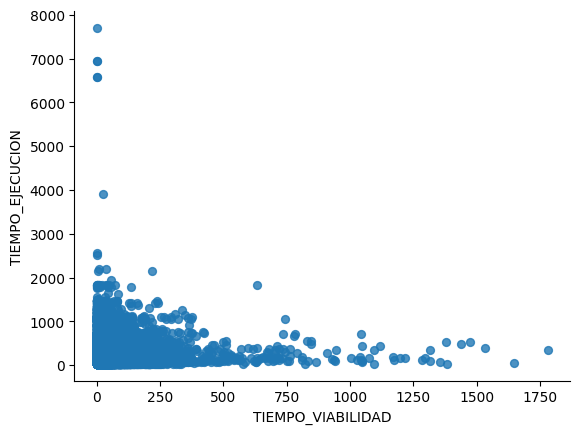

In [ ]:
# @title TIEMPO_VIABILIDAD vs TIEMPO_EJECUCION

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='TIEMPO_VIABILIDAD', y='TIEMPO_EJECUCION', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

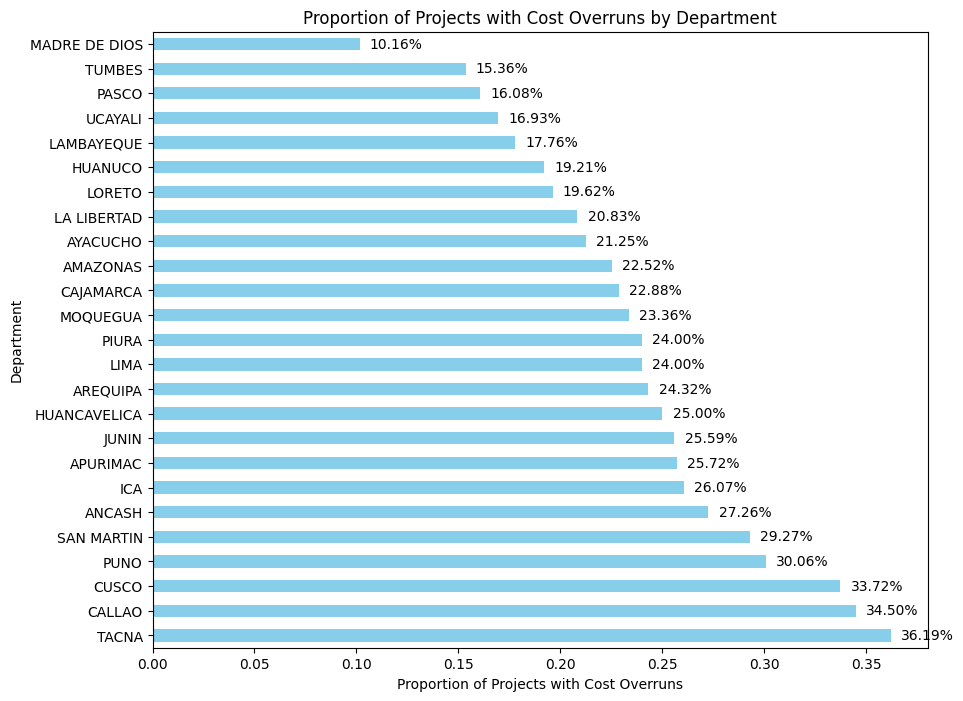

In [ ]:
# @title Proportion of Projects with Cost Overruns by Department

import matplotlib.pyplot as plt

department_sobrecosto = df.groupby('DPTO')['SOBRECOSTO'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.plot(kind='barh', color='skyblue')
plt.title('Proportion of Projects with Cost Overruns by Department')
plt.xlabel('Proportion of Projects with Cost Overruns')
plt.ylabel('Department')

# Add percentage labels to the bars
for i, v in enumerate(department_sobrecosto):
    plt.text(v + 0.005, i, f'{v:.2%}', va='center')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52447 entries, 0 to 52446
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   SOBRECOSTO               52447 non-null  float64 
 1   FUNCION                  52447 non-null  object  
 2   TIEMPO_VIABILIDAD        52447 non-null  float64 
 3   TIEMPO_EJECUCION         52447 non-null  float64 
 4   BENEFICIARIO             52447 non-null  float64 
 5   CTRL_CONCURR             52447 non-null  float64 
 6   MONTO_LAUDO              52447 non-null  float64 
 7   NATURALEZA_MEJORAMIENTO  52447 non-null  float64 
 8   NATURALEZA_AMPLIACION    52447 non-null  float64 
 9   NATURALEZA_RECUPERACION  52447 non-null  float64 
 10  NATURALEZA_CREACION      52447 non-null  float64 
 11  MODALIDAD_DIRECTA        52447 non-null  float64 
 12  MODALIDAD_INDIRECTA      52447 non-null  float64 
 13  MODIFICACION_F8          52447 non-null  float64 
 14  EXPEDI

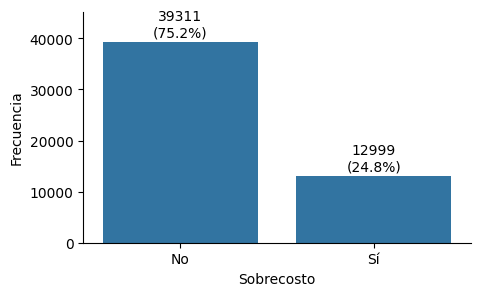

In [ ]:
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt

df['SOBRECOSTO_LABEL'] = df['SOBRECOSTO'].map({0: 'No', 1: 'Sí'})
plt.figure(figsize=(5,3))
ax = sns.countplot(x='SOBRECOSTO_LABEL', data=df, order=['No', 'Sí'])
plt.xlabel('Sobrecosto')
plt.ylabel('Frecuencia')

for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{count / len(df) * 100:.1f}%'
    ax.annotate(f'{count}\n({percentage})',
                (p.get_x() + p.get_width() / 2., p.get_height() + 500),
                ha='center', va='bottom', fontsize=10)
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)  # Ajustar límite superior del eje Y
sns.despine()  # Eliminar bordes del gráfico
plt.show()

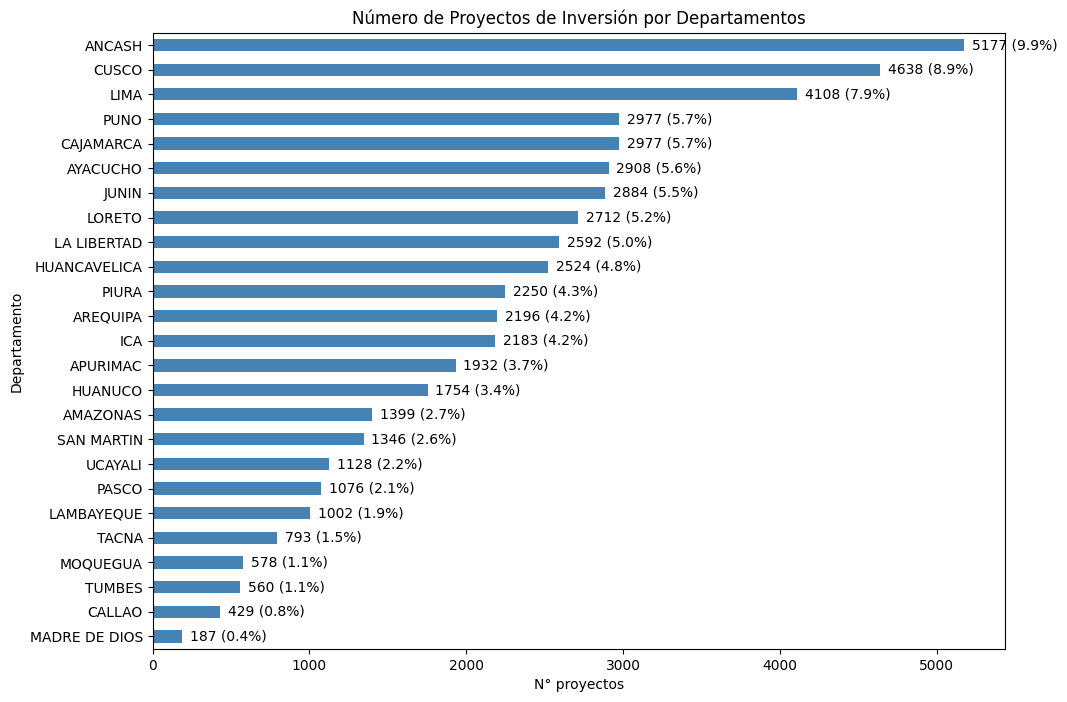

In [ ]:
import matplotlib.pyplot as plt
# Calcular la frecuencia de la variable 'DPTO'
# Calcular la frecuencia de la variable 'DPTO'
dpto_freq = df['DPTO'].value_counts()
total = len(df)
# Crear gráfico de barras horizontal con etiquetas de frecuencia y porcentaje
plt.figure(figsize=(11, 8))
ax = dpto_freq.plot(kind='barh', color='steelblue')
plt.title('Número de Proyectos de Inversión por Departamentos')
plt.xlabel('N° proyectos')
plt.ylabel('Departamento')
plt.gca().invert_yaxis()  # Invertir el eje Y

# Agregar etiquetas con frecuencia y porcentaje
for i, (value, name) in enumerate(zip(dpto_freq.values, dpto_freq.index)):
    percentage = f"{(value / total) * 100:.1f}%"
    plt.text(value + 50, i, f"{value} ({percentage})", va='center')

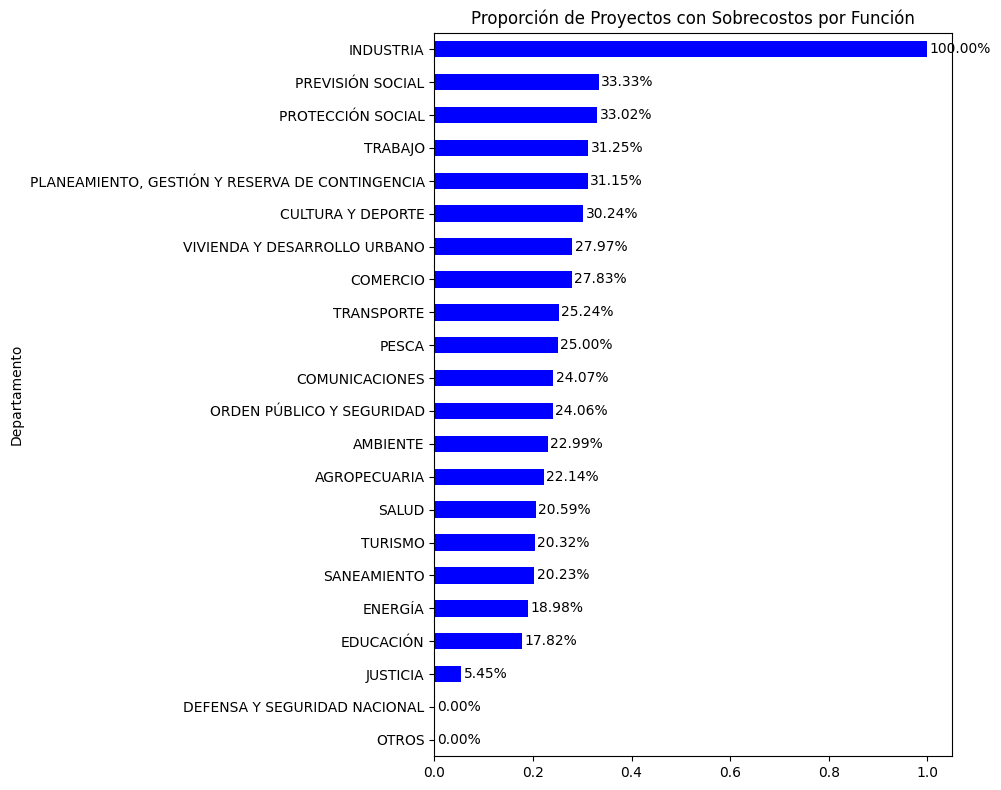

In [ ]:
import matplotlib.pyplot as plt
# Group data by department (DPTO) and calculate the proportion of projects with cost overruns
department_sobrecosto = df.groupby('FUNCION')['SOBRECOSTO'].mean()
# Sort by the proportion of projects with cost overruns
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot the data
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='blue')
plt.title('Proporción de Proyectos con Sobrecostos por Función')
#plt.xlabel('Proporción de Proyectos con Sobrecostos')
plt.ylabel('Departamento')
# Add percentage values on the bars
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

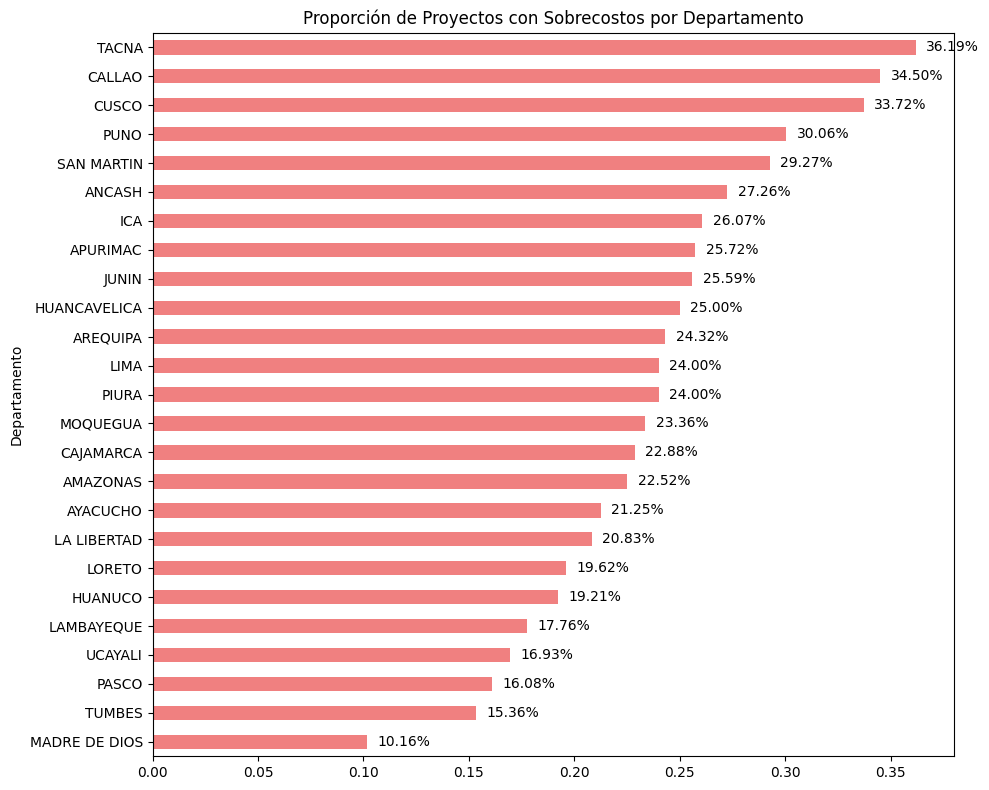

In [ ]:
import matplotlib.pyplot as plt
department_sobrecosto = df.groupby('DPTO')['SOBRECOSTO'].mean()
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Proporción de Proyectos con Sobrecostos por Departamento')
plt.ylabel('Departamento')
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

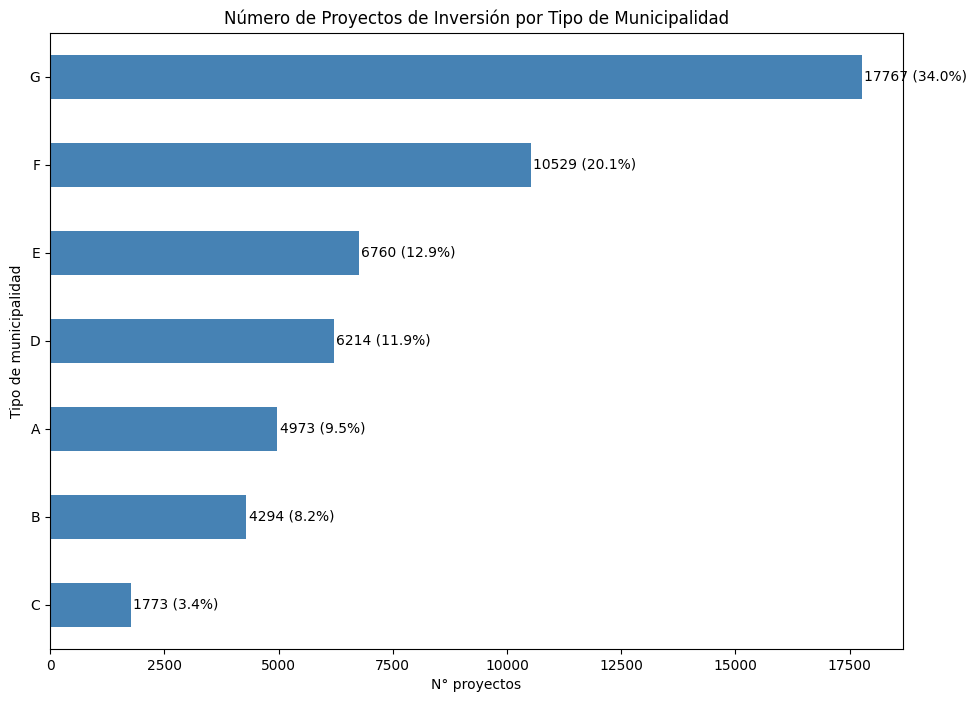

In [ ]:
import matplotlib.pyplot as plt
# Calcular la frecuencia de la variable 'DPTO'
# Calcular la frecuencia de la variable 'DPTO'
dpto_freq = df['TIPO_MUNICIPALIDAD'].value_counts()
total = len(df)
# Crear gráfico de barras horizontal con etiquetas de frecuencia y porcentaje
plt.figure(figsize=(11, 8))
ax = dpto_freq.plot(kind='barh', color='steelblue')
plt.title('Número de Proyectos de Inversión por Tipo de Municipalidad')
plt.xlabel('N° proyectos')
plt.ylabel('Tipo de municipalidad')
plt.gca().invert_yaxis()  # Invertir el eje Y

# Agregar etiquetas con frecuencia y porcentaje
for i, (value, name) in enumerate(zip(dpto_freq.values, dpto_freq.index)):
    percentage = f"{(value / total) * 100:.1f}%"
    plt.text(value + 50, i, f"{value} ({percentage})", va='center')



<ipython-input-14-02a1e0bbe4d8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  department_sobrecosto = df.groupby('TIPO_MUNICIPALIDAD')['SOBRECOSTO'].mean()


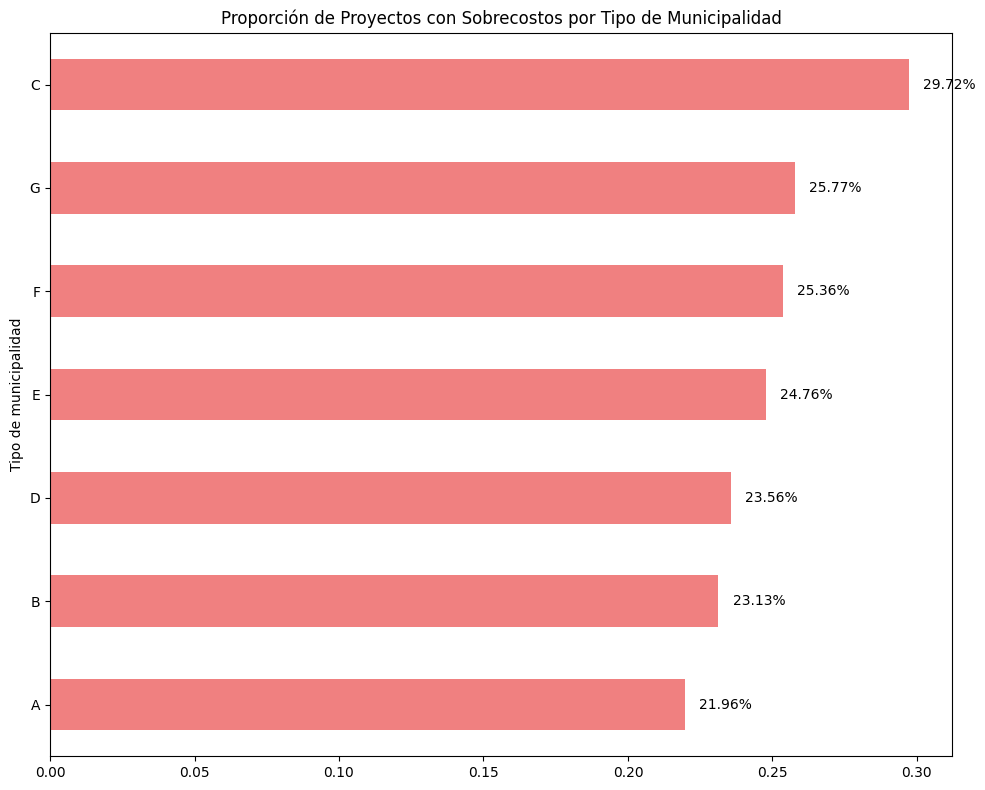

In [ ]:
import matplotlib.pyplot as plt
department_sobrecosto = df.groupby('TIPO_MUNICIPALIDAD')['SOBRECOSTO'].mean()
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Proporción de Proyectos con Sobrecostos por Tipo de Municipalidad')
plt.ylabel('Tipo de municipalidad')
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='DEPARTAMENTO', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

NameError: name 'detalle' is not defined

<Figure size 1500x800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='FUNCION', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Función')
plt.xlabel('Función')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

NameError: name 'detalle' is not defined

<Figure size 1500x800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'detalle' is a DataFrame you want to load or create.
# Replace 'your_data_source.csv' or 'your_data_creation_logic' with
# the actual source of your data or logic to create it.

# If loading from a file:
# detalle = pd.read_csv('your_data_source.csv')

# Or if creating the DataFrame programmatically:
# detalle = pd.DataFrame(your_data_creation_logic)

plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='FUNCION', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Función')
plt.xlabel('Función')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

NameError: name 'detalle' is not defined

<Figure size 1500x800 with 0 Axes>

In [ ]:
detalle.shape


(50711, 103)